In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

I use generic variable names numbered with the exercise number.

## Exercise 1

In [43]:
# Creating a 1-D vector

data_arr = np.array([x for x in range(0, 12)])
data_arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [44]:
# Reshaping the array

data_1 = data_arr.reshape(4, 3)
data_1

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [45]:
df_1 = pd.DataFrame(data_1, columns=['A', 'B', 'C'])
df_1

,A,B,C
0,0,1,2
1,3,4,5
2,6,7,8
3,9,10,11


/tmp/ipykernel_183039/3212997599.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_1.index)


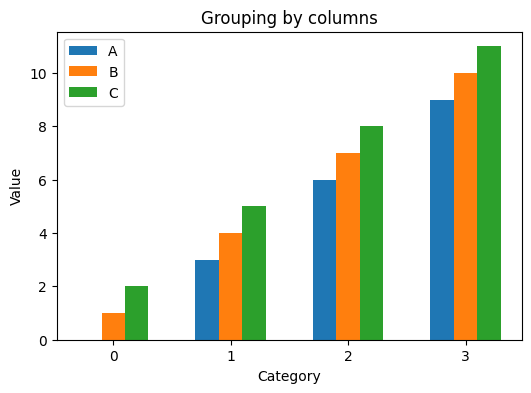

In [46]:
# First plot (Fig 3.26 (B))

fig, ax = plt.subplots(figsize=(6, 4))

# Setting bar width
width = 0.20
multiplier = 0

# Plotting all the columns
for col in df_1.columns:
    offset = width * multiplier
    ax.bar(df_1.index + offset, df_1[col], width, label=col)
    multiplier += 1

# Setting labels and titles
ax.set_xlabel('Category')
ax.set_ylabel('Value')
ax.set_title('Grouping by columns')

# Customizing x-ticks
ax.set_xticklabels(df_1.index)
ax.set_xticks(df_1.index+width)

# Legend
ax.legend()

plt.show();

In [47]:
# Transposing the DataFrame

new_df_1 = df_1.T
new_df_1

,0,1,2,3
A,0,3,6,9
B,1,4,7,10
C,2,5,8,11


/tmp/ipykernel_183039/2395404925.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_df_1.index)


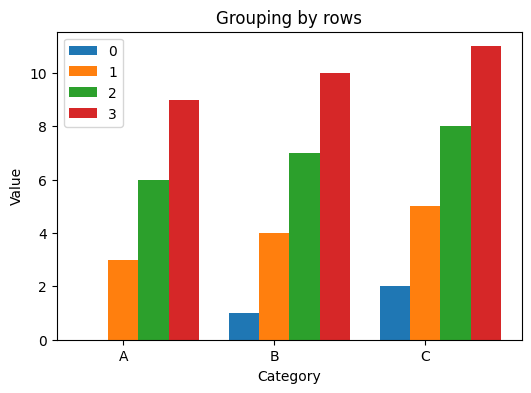

In [48]:
# Second plot (Fig 3.26 (C))

fig, ax = plt.subplots(figsize=(6, 4))

# Setting bar width
width = 0.20
multiplier = 0

# Need to convert new_df index in numerical form to shift each column by the offset.
x = np.arange(len(new_df_1.index))

# Plotting all the columns
for col in new_df_1.columns:
    offset = width * multiplier
    ax.bar(x+offset, new_df_1[col], width, label=col)
    multiplier += 1

# Setting labels and titles
ax.set_xlabel('Category')
ax.set_ylabel('Value')
ax.set_title('Grouping by rows')

# Customizing x-ticks
ax.set_xticklabels(new_df_1.index)
ax.set_xticks(x+width)

# Legend
ax.legend()

Exercise Completed.

## Exercise 2

In [49]:
# List of Columns

cols = [x for x in range(1,7)]
cols

[1, 2, 3, 4, 5, 6]

In [50]:
# Corresponding means

means = [(x + 1) **2 for x in cols]
means

[4, 9, 16, 25, 36, 49]

In [51]:
# Corresponding standard deviations

stds = [30*((2*x / 5) - 1)**2 for x in cols]
stds

[10.799999999999999,
 1.1999999999999993,
 1.1999999999999993,
 10.800000000000002,
 30.0,
 58.79999999999999]

In [52]:
# Empty DataFrame

df_2 = pd.DataFrame()
df_2

""


In [53]:
# Adding values to the Dataframe

for i in range(0,6):
    df_2[cols[i]] = np.random.normal(means[i], stds[i], 30)

In [54]:
# Checking dataframe

df_2.head()

,1,2,3,4,5,6
0,1.962134,8.040923,16.999983,10.531034,11.282429,140.216089
1,0.035297,8.219789,17.095814,31.894320,64.837072,-27.183507
2,-8.129765,9.381436,16.281775,34.096498,53.782067,41.554447
3,7.283911,8.400978,16.688272,22.880096,38.817985,170.829839
4,1.952905,9.695632,17.398881,9.549825,82.660642,60.756367


Text(0.5, 1.0, 'C) Error bar plot')

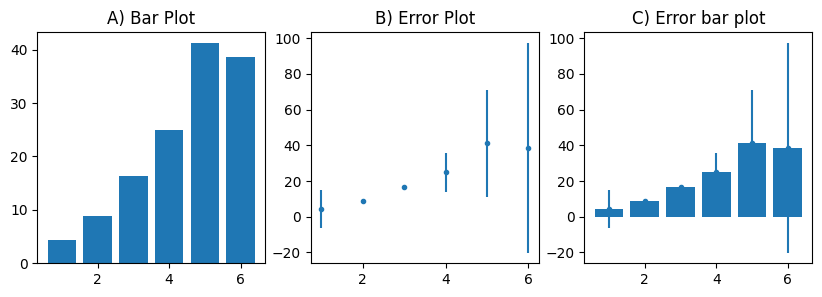

In [55]:
# Plotting

# Creating 3 figures in one row
fig, ax = plt.subplots(1, 3, figsize=(10,3))

# A plot
ax[0].bar(x=cols, height=[df_2[col].mean() for col in cols])
ax[0].set_title('A) Bar Plot')

# B plot
ax[1].errorbar(x=cols, y=[df_2[col].mean() for col in cols], yerr=stds, marker='.', linestyle='')
ax[1].set_title('B) Error Plot')

# C plot
ax[2].bar(x=cols, height=[df_2[col].mean() for col in cols])
ax[2].errorbar(x=cols, y=[df_2[col].mean() for col in cols], yerr=stds, marker='.', linestyle='')
ax[2].set_title('C) Error bar plot')

Exercise Completed.

## Exercise 3

In [56]:
# Data dict

d = {
    'Chocolate': 24,
     'Vanilla' : 16,
  'Strawberry' :  7,
   'Pistachio' : 16
   }

In [57]:
data_3 = pd.Series(d, index=d.keys())
data_3

Chocolate     24
Vanilla       16
Strawberry     7
Pistachio     16
dtype: int64

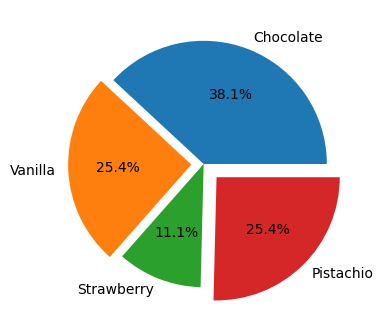

In [58]:
# Plot

fig, ax = plt.subplots(figsize=(4,4))

ax.pie(data_3, labels=data_3.index, autopct="%1.1f%%", explode=[0, 0.1, 0, 0.15]);

Exercise Completed.

## Exercise 4

In [59]:
# Creating the data

data_4 = np.random.gamma(shape=1, scale=1, size=500)
data_4[:10]

array([0.27347199, 0.44351347, 1.72337434, 0.42788004, 0.40764608,
       0.5890978 , 0.09290584, 0.89495455, 2.68977345, 0.37213044])

In [60]:
# Binning the data

y_4, x_4 = np.histogram(data_4, bins=40)
x_4 = (x_4[:-1] + x_4[1:]) /2

# Normalize the values

yp_4 = y_4*100 / np.sum(y_4)

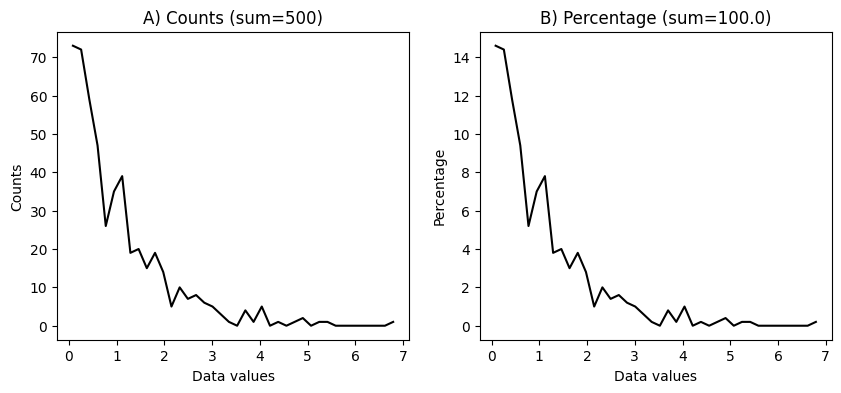

In [61]:
# Plot

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot A
axs[0].plot(x_4, y_4, color='black')
axs[0].set_title(f'A) Counts (sum={np.sum(y_4)})')
axs[0].set_xlabel('Data values')
axs[0].set_ylabel('Counts')

# Plot B
axs[1].plot(x_4, yp_4, color='black')
axs[1].set_title(f'B) Percentage (sum={np.sum(yp_4)})')
axs[1].set_xlabel('Data values')
axs[1].set_ylabel('Percentage')

plt.show();

Exercise Completed

## Exercise 5

In [62]:
# Parameters

N_5 = 200 # sample sizes
k_5 = 30 # number of bins

In [63]:
# Create the data

normal_5 = np.random.normal(2, 1, N_5)
exponential_5 = np.exp(np.random.normal(0,1, N_5))

In [64]:
# Define the bins

alldata = np.hstack((normal_5, exponential_5))
bins = np.linspace(np.min(alldata), np.max(alldata), k_5+1)
bins 

array([-0.46334004, -0.03594734,  0.39144535,  0.81883804,  1.24623074,
        1.67362343,  2.10101613,  2.52840882,  2.95580151,  3.38319421,
        3.8105869 ,  4.23797959,  4.66537229,  5.09276498,  5.52015768,
        5.94755037,  6.37494306,  6.80233576,  7.22972845,  7.65712114,
        8.08451384,  8.51190653,  8.93929923,  9.36669192,  9.79408461,
       10.22147731, 10.64887   , 11.07626269, 11.50365539, 11.93104808,
       12.35844078])

In [65]:
# Get histogram values

y1_5, x1_5 = np.histogram(normal_5, bins=bins)
y2_5, x2_5 = np.histogram(exponential_5, bins=bins)

# Bin midpoints

xx_5 = (x1_5[:-1]+x1_5[1:]) / 2 

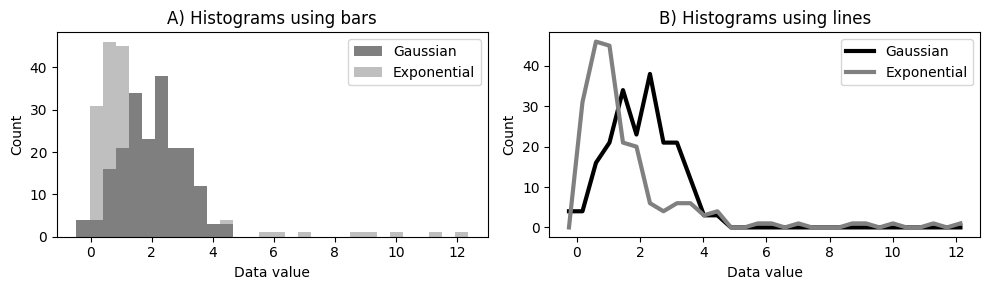

In [66]:
# Plot

fig, axs = plt.subplots(1, 2, figsize=(10,3))

# Draw the histograms using matplotlib
axs[0].hist(normal_5, bins=bins, label='Gaussian', alpha=0.5, color='black')
axs[0].hist(exponential_5, bins=bins, label='Exponential', alpha=0.5, color='gray')
axs[0].set_title('A) Histograms using bars')

# Line plot
axs[1].plot(xx_5, y1_5, linewidth=3, label='Gaussian', color='black')
axs[1].plot(xx_5, y2_5, linewidth=3, label='Exponential', color='gray')
axs[1].set_title('B) Histograms using lines')

for a in axs:
    a.set_xlabel('Data value')
    a.set_ylabel('Count')
    a.legend()

plt.tight_layout()
plt.show();

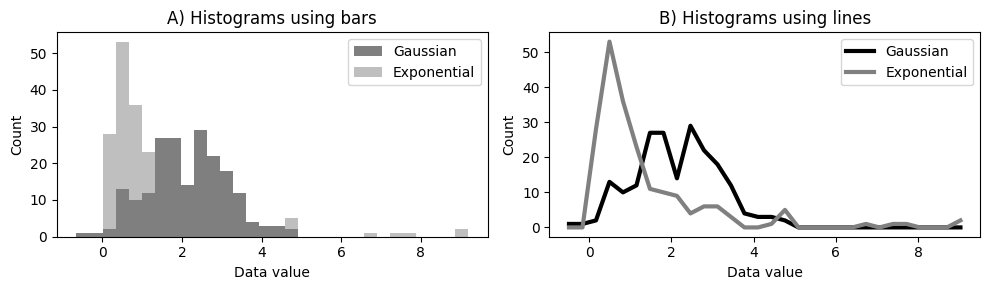

In [67]:
# Changing the parameters 

# Parameters

N_5 = 200 # sample sizes
k_5 = 30 # number of bins


# Create the data

normal_5 = np.random.normal(2, 1, N_5)
exponential_5 = np.exp(np.random.normal(0,1, N_5))


# Define the bins

alldata = np.hstack((normal_5, exponential_5))
bins = np.linspace(np.min(alldata), np.max(alldata), k_5+1)


# Get histogram values

y1_5, x1_5 = np.histogram(normal_5, bins=bins)
y2_5, x2_5 = np.histogram(exponential_5, bins=bins)

# Bin midpoints

xx_5 = (x1_5[:-1]+x1_5[1:]) / 2 


# Plot

fig, axs = plt.subplots(1, 2, figsize=(10,3))

# Draw the histograms using matplotlib
axs[0].hist(normal_5, bins=bins, label='Gaussian', alpha=0.5, color='black')
axs[0].hist(exponential_5, bins=bins, label='Exponential', alpha=0.5, color='gray')
axs[0].set_title('A) Histograms using bars')

# Line plot
axs[1].plot(xx_5, y1_5, linewidth=3, label='Gaussian', color='black')
axs[1].plot(xx_5, y2_5, linewidth=3, label='Exponential', color='gray')
axs[1].set_title('B) Histograms using lines')

for a in axs:
    a.set_xlabel('Data value')
    a.set_ylabel('Count')
    a.legend()

plt.tight_layout()
plt.show();

For a small sample size, the histogram is more interpretable. But for a big sample size, the line plots are more interpretable.

Exercise completed.

## Exercise 6

In [68]:
x1_6 = np.linspace(0, 6, 1001)
y1_6 = x1_6 / 2

y1_e_6 = np.exp(x1_6)

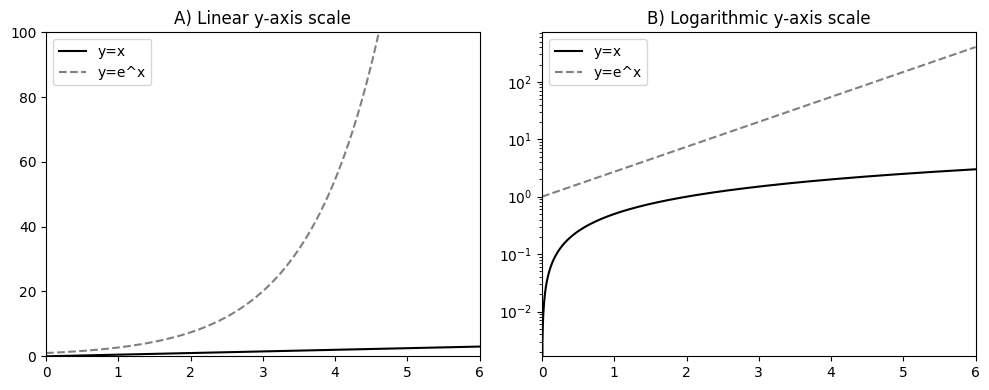

In [69]:
# Plot

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# First plot
axs[0].plot(x1_6, y1_6, linestyle='-', color='black', label='y=x')
axs[0].plot(x1_6, y1_e_6, linestyle='--', color='gray', label='y=e^x')
axs[0].set_title('A) Linear y-axis scale')
axs[0].set_xlim([np.min(x1_6), np.max(x1_6)])
axs[0].set_ylim([0, 100])
axs[0].legend()

# Second plot
axs[1].plot(x1_6, y1_6, linestyle='-', color='black', label='y=x')
axs[1].plot(x1_6, y1_e_6, linestyle='--', color='gray', label='y=e^x')
axs[1].set_title('B) Logarithmic y-axis scale')
axs[1].set_xlim([np.min(x1_6), np.max(x1_6)])
axs[1].set_yscale('log')
axs[1].legend()

plt.tight_layout()
plt.show();

In [70]:
# Using -x instead of x.

x1_6 = np.linspace(0, 6, 1001)
y1_6 = - x1_6 / 2

y1_e_6 = np.exp(x1_6)

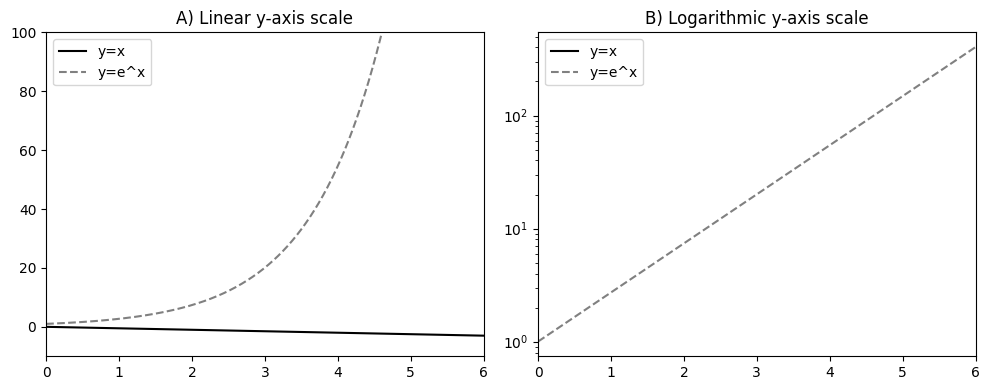

In [71]:
# Plot

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# First plot
axs[0].plot(x1_6, y1_6, linestyle='-', color='black', label='y=x')
axs[0].plot(x1_6, y1_e_6, linestyle='--', color='gray', label='y=e^x')
axs[0].set_title('A) Linear y-axis scale')
axs[0].set_xlim([np.min(x1_6), np.max(x1_6)])
axs[0].set_ylim([-10, 100])
axs[0].legend()

# Second plot
axs[1].plot(x1_6, y1_6, linestyle='-', color='black', label='y=x')
axs[1].plot(x1_6, y1_e_6, linestyle='--', color='gray', label='y=e^x')
axs[1].set_title('B) Logarithmic y-axis scale')
axs[1].set_xlim([np.min(x1_6), np.max(x1_6)])
axs[1].set_yscale('log')
axs[1].legend()

plt.tight_layout()
plt.show();

So the linear plot is as expected, only the linear line is below zero. but the y=x plot disappears for log plot given that log of a negative number does not exist in real numbers. thus, log y-axis scaling is valid only for positive valued data.

Exercise Completed.